In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/spam[1].csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2759,ham,"Can meh? Thgt some will clash... Really ah, i ...",NaN,NaN,NaN
1596,spam,As a Registered Subscriber yr draw 4 a å£100 g...,NaN,NaN,NaN
3745,ham,I'm not. She lip synced with shangela.,NaN,NaN,NaN
3837,ham,Went to pay rent. So i had to go to the bank t...,NaN,NaN,NaN
1427,ham,THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


##removing un necessary columns

In [6]:
new_df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## change the column names

In [7]:
new_df.rename(columns={'v1':'target','v2':'text'},inplace=True)
new_df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
new_df['target'].value_counts()

,count
target,
ham,4825
spam,747


In [11]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 59.8 MB/s eta 0:00:00


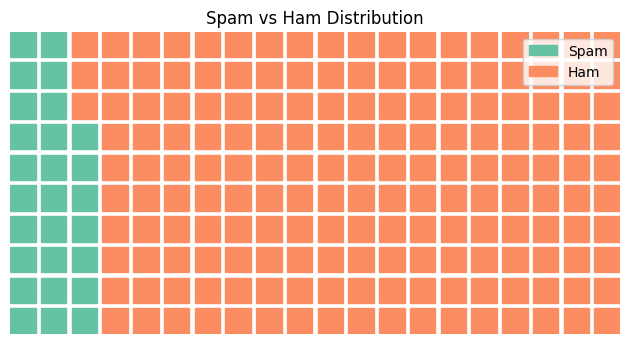

In [18]:
from pywaffle import Waffle

target_counts = new_df['target'].value_counts()
data = {
    'Spam': target_counts['spam'],
    'Ham': target_counts['ham']
}

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=data,
)
plt.title("Spam vs Ham Distribution")
plt.show()


## convert target to numeric

In [19]:
new_df = new_df.replace({'spam': 1, 'ham': 0})
new_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## preprocess the text columns

In [20]:
new_df.duplicated().sum()

np.int64(403)

In [21]:
new_df = new_df.drop_duplicates(keep='first')

In [24]:
new_df.shape

(5169, 2)

## shape after remove duplicates

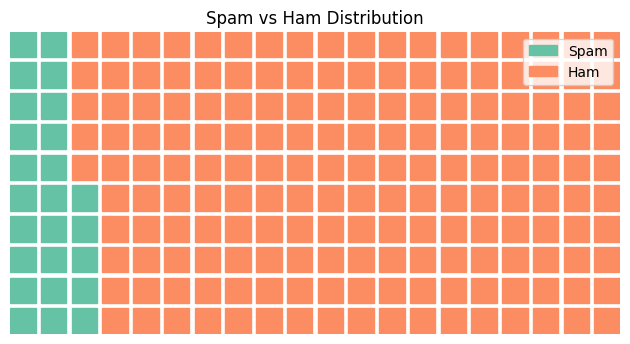

In [27]:
target_counts = new_df['target'].value_counts()
data = {
    'Spam': target_counts[1],
    'Ham': target_counts[0]
}

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=data,
)
plt.title("Spam vs Ham Distribution")
plt.show()

In [28]:
new_df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## create a function to remove stopwords, punctuation, stemming, lemmatization

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
new_df['text'] = new_df['text'].apply(preprocess_text)

In [33]:
new_df.head()

,target,text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though


In [35]:
new_df['text'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## EDA

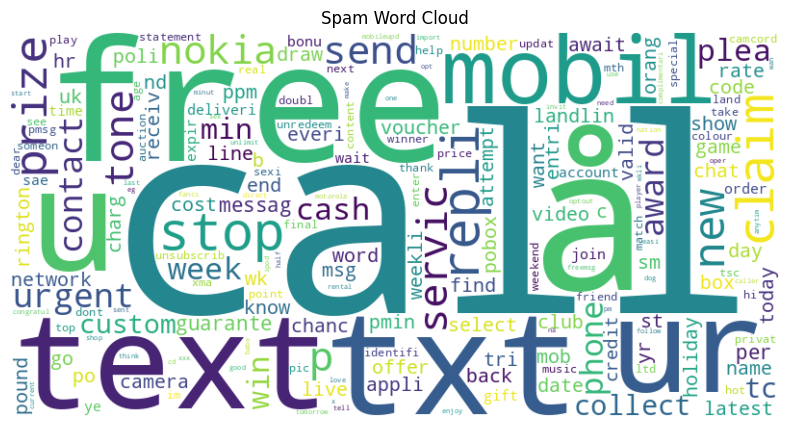

In [40]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

# Separate spam and ham messages
spam_messages = new_df[new_df['target'] == 1]['text']
ham_messages = new_df[new_df['target'] == 0]['text']

# Create word clouds
spam_text = ' '.join(spam_messages)
ham_text = ' '.join(ham_messages)


def plot_wordcloud(text, title, mask_path=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, collocations=False).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(spam_text, "Spam Word Cloud")

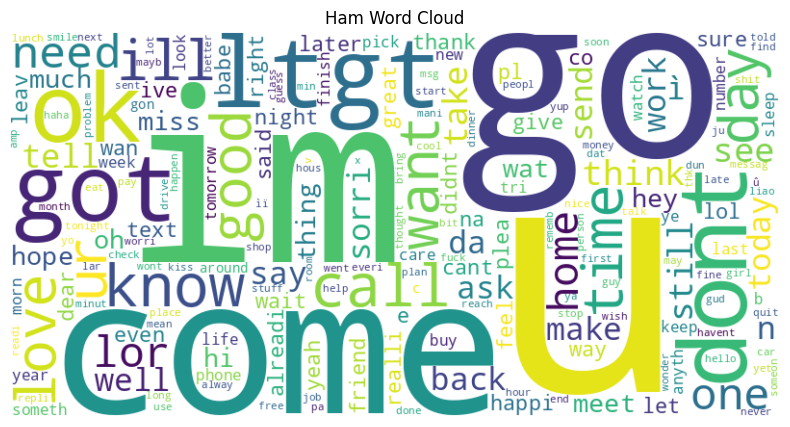

In [41]:
plot_wordcloud(ham_text, "Ham Word Cloud")

## Vectorization using tfidf

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_df['text'])
y = new_df['target']


In [45]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
# Convert the csr_matrix to a dense array
X_dense = X.toarray()

# Display the first 5 rows
print(X_dense[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
len(X_dense[1])

7083

In [52]:
y

,target
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 7083), (1034, 7083), (4135,), (1034,))

## Model

In [54]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [55]:
y_pred = mnb.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9613152804642167


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



# Hyperparameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 0.1, 'fit_prior': True}
Best Score: 0.9712212817412335


In [60]:
best_mnb = grid_search.best_estimator_
y_pred = best_mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of best model: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy of best model: 0.97678916827853
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.92      0.91      0.92       145

    accuracy                           0.98      1034
   macro avg       0.95      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034



## test the best model with use input

In [61]:
def predict_message(user_input):
    # Preprocess the user input
    user_input_processed = preprocess_text(user_input)

    # Vectorize the processed input
    user_input_vectorized = vectorizer.transform([user_input_processed])

    # Make prediction
    prediction = best_mnb.predict(user_input_vectorized)

    # Return prediction
    if prediction[0] == 1:
        return "Spam"
    else:
        return "Ham"

In [63]:
user_input = input("Enter a message: ")
prediction = predict_message(user_input)
print(f"Prediction: {prediction}")


Enter a message: your order will be delivered today
Prediction: Ham
